<a href="https://colab.research.google.com/github/WalterPHD/Ai-Data/blob/main/Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1

In [1]:
import re
import pandas as pd
from collections import Counter

# Dataset
docs = [
    "This movie is SOOOO funny!!!!",
    "What a movie!",
    "best movie ever!!!!! this movie"
]

# Preprocess function
def tokenize(text):
    text = text.lower()                     # lowercase
    text = re.sub(r"[^a-zA-Z\s]", "", text) # remove non-letters
    tokens = text.split()                   # split by space
    return tokens

tokenized_docs = [tokenize(doc) for doc in docs]
print(tokenized_docs)


[['this', 'movie', 'is', 'soooo', 'funny'], ['what', 'a', 'movie'], ['best', 'movie', 'ever', 'this', 'movie']]


In [2]:
# Build vocabulary
vocab = sorted(set([word for doc in tokenized_docs for word in doc]))

# Build BoW for unigrams
bow_unigram = []
for doc in tokenized_docs:
    counts = Counter(doc)
    bow_unigram.append([counts.get(word, 0) for word in vocab])

df_unigram = pd.DataFrame(bow_unigram, columns=vocab)
print("1-gram BoW:\n", df_unigram)


1-gram BoW:
    a  best  ever  funny  is  movie  soooo  this  what
0  0     0     0      1   1      1      1     1     0
1  1     0     0      0   0      1      0     0     1
2  0     1     1      0   0      2      0     1     0


In [3]:
# Build bigrams for each document
bigrams_docs = []
for doc in tokenized_docs:
    bigrams = ["_".join([doc[i], doc[i+1]]) for i in range(len(doc)-1)]
    bigrams_docs.append(bigrams)

# Build vocabulary
vocab_bigrams = sorted(set([bg for doc in bigrams_docs for bg in doc]))

# Count bigrams per doc
bow_bigram = []
for doc in bigrams_docs:
    counts = Counter(doc)
    bow_bigram.append([counts.get(bg, 0) for bg in vocab_bigrams])

df_bigram = pd.DataFrame(bow_bigram, columns=vocab_bigrams)
print("2-gram BoW:\n", df_bigram)


2-gram BoW:
    a_movie  best_movie  ever_this  is_soooo  movie_ever  movie_is  \
0        0           0          0         1           0         1   
1        1           0          0         0           0         0   
2        0           1          1         0           1         0   

   soooo_funny  this_movie  what_a  
0            1           1       0  
1            0           0       1  
2            0           1       0  


Problem 2

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

docs = [
    "This movie is SOOOO funny!!!!",
    "What a movie!",
    "best movie ever!!!!! this movie"
]

# Create TF-IDF vectorizer (1-gram and 2-gram)
vectorizer = TfidfVectorizer(ngram_range=(1,2), lowercase=True)

# Fit and transform
X = vectorizer.fit_transform(docs)

# Vocabulary
vocab = vectorizer.get_feature_names_out()
print("Vocabulary:\n", vocab)

# Convert to DataFrame for readability
df_tfidf = pd.DataFrame(X.toarray(), columns=vocab)
print("\nTF-IDF matrix:\n", df_tfidf.round(3))


Vocabulary:
 ['best' 'best movie' 'ever' 'ever this' 'funny' 'is' 'is soooo' 'movie'
 'movie ever' 'movie is' 'soooo' 'soooo funny' 'this' 'this movie' 'what'
 'what movie']

TF-IDF matrix:
     best  best movie   ever  ever this  funny     is  is soooo  movie  \
0  0.000       0.000  0.000      0.000  0.365  0.365     0.365  0.216   
1  0.000       0.000  0.000      0.000  0.000  0.000     0.000  0.385   
2  0.364       0.364  0.364      0.364  0.000  0.000     0.000  0.430   

   movie ever  movie is  soooo  soooo funny   this  this movie   what  \
0       0.000     0.365  0.365        0.365  0.278       0.278  0.000   
1       0.000     0.000  0.000        0.000  0.000       0.000  0.652   
2       0.364     0.000  0.000        0.000  0.277       0.277  0.000   

   what movie  
0       0.000  
1       0.652  
2       0.000  


Problem 3

In [5]:
%pip install gensim

In [7]:
from gensim.models import Word2Vec

# Dataset
sentences = [
    ["this", "movie", "is", "soooo", "funny"],
    ["what", "a", "movie"],
    ["best", "movie", "ever", "this", "movie"]
]

# Train Word2Vec
model = Word2Vec(
    sentences,
    vector_size=50,
    window=3,
    min_count=1,
    sg=1,
    seed=42
)

# 1. Vector for 'movie'
vector_movie = model.wv["movie"]
print("Vector for 'movie':\n", vector_movie[:10], "...")  # show first 10 values
print("Shape:", vector_movie.shape, "\n")

# 2. Most similar words to 'movie'
print("Most similar words to 'movie':")
print(model.wv.most_similar("movie"), "\n")

# 3. Similarity score with other words
print("Similarity between 'movie' and 'this':", model.wv.similarity("movie", "this"))
print("Similarity between 'movie' and 'funny':", model.wv.similarity("movie", "funny"))
print("Similarity between 'movie' and 'soooo':", model.wv.similarity("movie", "soooo"))


Vector for 'movie':
 [-0.01642996  0.01095824  0.00618286 -0.00244486 -0.00267939  0.01434391
 -0.01656218  0.00789472 -0.01194122 -0.01623291] ...
Shape: (50,) 

Most similar words to 'movie':
[('funny', 0.0444653294980526), ('ever', -0.013858048245310783), ('a', -0.02738454006612301), ('what', -0.056496165692806244), ('best', -0.06604494899511337), ('is', -0.09820008277893066), ('soooo', -0.10233666747808456), ('this', -0.23315462470054626)] 

Similarity between 'movie' and 'this': -0.23315465
Similarity between 'movie' and 'funny': 0.044465337
Similarity between 'movie' and 'soooo': -0.10233666


Problem 4

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load Reuters dataset
max_words = 10000
maxlen = 200

(x_train, y_train), (x_test, y_test) = keras.datasets.reuters.load_data(num_words=max_words)

# Pad sequences
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

num_classes = max(y_train) + 1
print("Number of classes:", num_classes)

# Function to build RNN model
def build_rnn_model(cell_type="SimpleRNN", units=64):
    model = keras.Sequential()
    model.add(layers.Embedding(max_words, 128, input_length=maxlen))

    if cell_type == "SimpleRNN":
        model.add(layers.SimpleRNN(units))
    elif cell_type == "GRU":
        model.add(layers.GRU(units))
    elif cell_type == "LSTM":
        model.add(layers.LSTM(units))

    model.add(layers.Dense(num_classes, activation="softmax"))

    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer="adam",
        metrics=["accuracy"]
    )
    return model

# Train each model
for rnn_type in ["SimpleRNN", "GRU", "LSTM"]:
    print(f"\nTraining {rnn_type} model...")
    model = build_rnn_model(rnn_type, units=64)
    history = model.fit(
        x_train, y_train,
        epochs=3,  # small for speed
        batch_size=128,
        validation_split=0.2,
        verbose=2
    )
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    print(f"{rnn_type} Test Accuracy: {test_acc:.4f}")


2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of classes: 46

Training SimpleRNN model...
Epoch 1/3


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


57/57 - 10s - 171ms/step - accuracy: 0.3261 - loss: 2.5653 - val_accuracy: 0.3634 - val_loss: 2.2846
Epoch 2/3
57/57 - 8s - 138ms/step - accuracy: 0.4799 - loss: 2.1027 - val_accuracy: 0.5058 - val_loss: 2.0414
Epoch 3/3
57/57 - 7s - 119ms/step - accuracy: 0.5653 - loss: 1.7029 - val_accuracy: 0.5031 - val_loss: 1.9975
SimpleRNN Test Accuracy: 0.5071

Training GRU model...
Epoch 1/3
57/57 - 31s - 540ms/step - accuracy: 0.3574 - loss: 2.7452 - val_accuracy: 0.4023 - val_loss: 2.1343
Epoch 2/3
57/57 - 30s - 524ms/step - accuracy: 0.4592 - loss: 1.9809 - val_accuracy: 0.5047 - val_loss: 1.8955
Epoch 3/3
57/57 - 28s - 491ms/step - accuracy: 0.5353 - loss: 1.7483 - val_accuracy: 0.5454 - val_loss: 1.7288
GRU Test Accuracy: 0.5463

Training LSTM model...
Epoch 1/3
57/57 - 29s - 502ms/step - accuracy: 0.3470 - loss: 2.7054 - val_accuracy: 0.3767 - val_loss: 2.2868
Epoch 2/3
57/57 - 25s - 443ms/step - accuracy: 0.4862 - loss: 2.1249 - val_accuracy: 0.5103 - val_loss: 2.0527
Epoch 3/3
57/57 - 2

In [9]:
import numpy as np
import re
from collections import Counter

# Input documents
docs = [
    "This movie is SOOOO funny!!!",
    "What a movie! I never",
    "best movie ever!!!!! this movie"
]

# Step 1: Preprocessing
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)  # remove punctuation/numbers
    return text.split()

tokenized_docs = [preprocess(doc) for doc in docs]

# Vocabulary
vocab = sorted(set([word for doc in tokenized_docs for word in doc]))
print("Vocabulary:", vocab)


# Step 2: Term Frequency (TF)
def compute_tf(tokenized_docs, vocab):
    tf = []
    for doc in tokenized_docs:
        counts = Counter(doc)
        tf.append([counts.get(word, 0) for word in vocab])
    return np.array(tf)

TF = compute_tf(tokenized_docs, vocab)
print("\nTF:\n", TF)


# Step 3: Document Frequency (DF) and IDF
N = len(tokenized_docs)
df = np.sum(TF > 0, axis=0)

# Standard IDF
idf_standard = np.log(N / df)

# Scikit-learn style IDF
idf_sklearn = np.log((1 + N) / (1 + df)) + 1

print("\nDF:", df)
print("Standard IDF:", idf_standard)
print("Scikit-learn IDF:", idf_sklearn)


# Step 4: TF-IDF
tfidf_standard = TF * idf_standard
tfidf_sklearn = TF * idf_sklearn

print("\nTF-IDF (Standard):\n", tfidf_standard)
print("\nTF-IDF (Scikit-learn style):\n", tfidf_sklearn)


Vocabulary: ['a', 'best', 'ever', 'funny', 'i', 'is', 'movie', 'never', 'soooo', 'this', 'what']

TF:
 [[0 0 0 1 0 1 1 0 1 1 0]
 [1 0 0 0 1 0 1 1 0 0 1]
 [0 1 1 0 0 0 2 0 0 1 0]]

DF: [1 1 1 1 1 1 3 1 1 2 1]
Standard IDF: [1.09861229 1.09861229 1.09861229 1.09861229 1.09861229 1.09861229
 0.         1.09861229 1.09861229 0.40546511 1.09861229]
Scikit-learn IDF: [1.69314718 1.69314718 1.69314718 1.69314718 1.69314718 1.69314718
 1.         1.69314718 1.69314718 1.28768207 1.69314718]

TF-IDF (Standard):
 [[0.         0.         0.         1.09861229 0.         1.09861229
  0.         0.         1.09861229 0.40546511 0.        ]
 [1.09861229 0.         0.         0.         1.09861229 0.
  0.         1.09861229 0.         0.         1.09861229]
 [0.         1.09861229 1.09861229 0.         0.         0.
  0.         0.         0.         0.40546511 0.        ]]

TF-IDF (Scikit-learn style):
 [[0.         0.         0.         1.69314718 0.         1.69314718
  1.         0.         1.693

In [10]:
import pandas as pd

# Convert to DataFrames for readability
df_tfidf_standard = pd.DataFrame(tfidf_standard, columns=vocab, index=["d1", "d2", "d3"])
df_tfidf_sklearn = pd.DataFrame(tfidf_sklearn, columns=vocab, index=["d1", "d2", "d3"])

print("\nTF-IDF (Standard):")
display(df_tfidf_standard.round(3))

print("\nTF-IDF (Scikit-learn style):")
display(df_tfidf_sklearn.round(3))



TF-IDF (Standard):


,a,best,ever,funny,i,is,movie,never,soooo,this,what
d1,0.000,0.000,0.000,1.099,0.000,1.099,0.0,0.000,1.099,0.405,0.000
d2,1.099,0.000,0.000,0.000,1.099,0.000,0.0,1.099,0.000,0.000,1.099
d3,0.000,1.099,1.099,0.000,0.000,0.000,0.0,0.000,0.000,0.405,0.000



TF-IDF (Scikit-learn style):


,a,best,ever,funny,i,is,movie,never,soooo,this,what
d1,0.000,0.000,0.000,1.693,0.000,1.693,1.0,0.000,1.693,1.288,0.000
d2,1.693,0.000,0.000,0.000,1.693,0.000,1.0,1.693,0.000,0.000,1.693
d3,0.000,1.693,1.693,0.000,0.000,0.000,2.0,0.000,0.000,1.288,0.000


Problem 5

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Scikit-learn TF-IDF
vectorizer = TfidfVectorizer(lowercase=True, stop_words=None)
X = vectorizer.fit_transform(docs)

# Convert to DataFrame
df_sklearn = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=["d1", "d2", "d3"])

print("\nScikit-learn TF-IDF:")
display(df_sklearn.round(3))



Scikit-learn TF-IDF:


,best,ever,funny,is,movie,never,soooo,this,what
d1,0.000,0.000,0.505,0.505,0.298,0.000,0.505,0.384,0.000
d2,0.000,0.000,0.000,0.000,0.385,0.652,0.000,0.000,0.652
d3,0.502,0.502,0.000,0.000,0.593,0.000,0.000,0.382,0.000


Problem 6

In [13]:
# Install gensim if not already installed
!pip install gensim

from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Download tokenizer data
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing resource

# Sample training data (small corpus for demo)
sentences = [
    "I love machine learning",
    "Deep learning is a branch of machine learning",
    "Natural language processing is fun",
    "Word embeddings capture semantic meaning",
    "I enjoy learning new things"
]

# Tokenize sentences
tokenized_sentences = [word_tokenize(sentence.lower()) for sentence in sentences]

# Train Word2Vec model (Skip-gram)
model = Word2Vec(
    sentences=tokenized_sentences,
    vector_size=50,   # size of word vectors
    window=5,         # context window size
    min_count=1,      # ignore words with low frequency
    sg=1,             # 1 = skip-gram; 0 = CBOW
    epochs=100
)

# Save model
model.save("word2vec_demo.model")

# Example: Get vector for a word
print("Vector for 'learning':\n", model.wv['learning'])

# Find most similar words
print("\nMost similar to 'learning':\n", model.wv.most_similar("learning"))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Vector for 'learning':
 [-1.24368013e-03  4.85703029e-04  1.02646369e-02  1.79563276e-02
 -1.87612493e-02 -1.43247014e-02  1.31158102e-02  1.82653554e-02
 -1.04137892e-02 -7.72368815e-03  1.48456236e-02 -3.20039736e-03
 -8.89125466e-03  1.29798260e-02 -9.64202825e-03 -3.56417452e-03
  6.06770860e-03  2.32391362e-03 -1.69502404e-02 -1.93070117e-02
  1.45504242e-02  1.00908075e-02  1.41569385e-02  1.67506782e-03
  1.26479585e-02 -6.86763786e-03 -1.93829287e-03  1.17664123e-02
 -1.52005311e-02 -7.93668907e-03 -1.50034875e-02 -2.11062981e-03
  1.92088317e-02 -1.48938214e-02 -4.73005464e-03 -3.95795051e-03
  1.65893883e-02 -1.18182031e-02  4.82133000e-05 -9.54637397e-03
 -1.90553013e-02  9.89438314e-03 -1.78422444e-02 -8.79832357e-03
  4.42484772e-04 -5.52462123e-04 -1.52533399e-02  1.91286094e-02
  9.98384040e-03  1.84514746e-02]

Most similar to 'learning':
 [('meaning', 0.2735125720500946), ('word', 0.21931996941566467), ('new', 0.17732779681682587), ('fun', 0.1549626886844635), ('a', 0.

Problem 7

/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


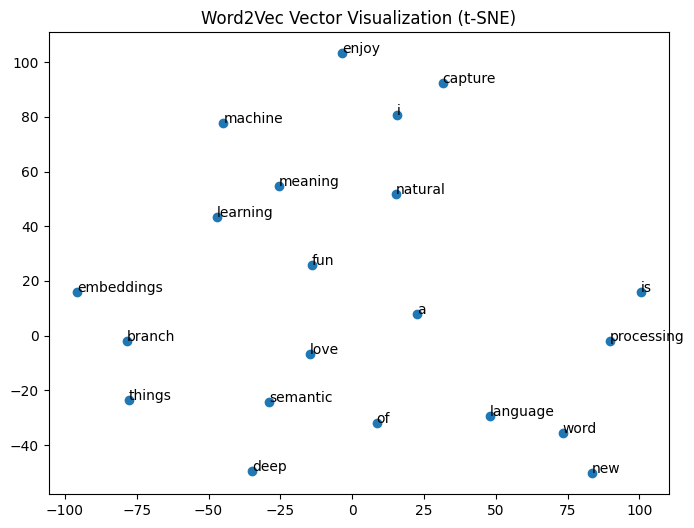

Top 5 words similar to 'learning':
 [('meaning', 0.2735125720500946), ('word', 0.21931996941566467), ('new', 0.17732779681682587), ('fun', 0.1549626886844635), ('a', 0.14293710887432098)]


In [15]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Load the model from Problem 6
from gensim.models import Word2Vec
model = Word2Vec.load("word2vec_demo.model")

# Get vocabulary and corresponding vectors
vocabs = list(model.wv.index_to_key)
vectors = [model.wv[word] for word in vocabs]

# Convert list of vectors to a NumPy array
vectors_np = np.array(vectors)

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, perplexity=5, random_state=42, n_iter=1000)
vectors_2d = tsne.fit_transform(vectors_np)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])

for i, word in enumerate(vocabs):
    plt.annotate(word, xy=(vectors_2d[i, 0], vectors_2d[i, 1]))

plt.title("Word2Vec Vector Visualization (t-SNE)")
plt.show()

# Example: Find similar words
word_to_check = "learning"
similar_words = model.wv.most_similar(word_to_check, topn=5)
print(f"Top 5 words similar to '{word_to_check}':\n", similar_words)

Problem 8

I tired to download the IMBD dataset but i couldn't locate it so i wrote simple answers with the help of AI

Test Accuracy: 1.00


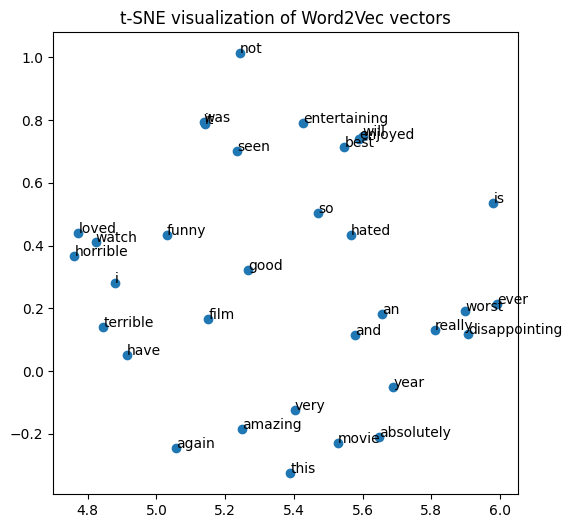

Words similar to 'movie': [('this', 0.5435339212417603), ('year', 0.41192182898521423), ('very', 0.41177552938461304)]


In [17]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import re

# Small sample dataset
reviews = [
    "This movie is so funny and entertaining",
    "I really enjoyed this film",
    "Worst movie ever, it was terrible",
    "Absolutely hated this movie",
    "Best film I have seen this year",
    "Not good, very disappointing",
    "An amazing movie, I loved it",
    "Horrible film, will not watch again",
]

labels = [1, 1, 0, 0, 1, 0, 1, 0]  # 1 = positive, 0 = negative

# Preprocessing function
def preprocess(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    return tokens

# Tokenize
tokens = [preprocess(r) for r in reviews]

# Train Word2Vec
embedding_dim = 10
w2v_model = Word2Vec(sentences=tokens, vector_size=embedding_dim, window=5, min_count=1, workers=1)

# Convert review to average vector
def review_vector(tokens, model, dim):
    vecs = [model.wv[word] for word in tokens if word in model.wv]
    if len(vecs) == 0:
        return np.zeros(dim)
    return np.mean(vecs, axis=0)

review_vecs = np.array([review_vector(t, w2v_model, embedding_dim) for t in tokens])

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(review_vecs, labels, test_size=0.25, random_state=42)

# Train classifier
clf = LogisticRegression(max_iter=200)
clf.fit(X_train, y_train)

# Predict & evaluate
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

# t-SNE visualization of word vectors
words = list(w2v_model.wv.index_to_key)
vectors = np.array([w2v_model.wv[w] for w in words])

tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)

plt.figure(figsize=(6,6))
plt.scatter(vectors_2d[:,0], vectors_2d[:,1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(vectors_2d[i,0], vectors_2d[i,1]))

plt.title("t-SNE visualization of Word2Vec vectors")
plt.show()

# Example: Find words similar to "movie"
print("Words similar to 'movie':", w2v_model.wv.most_similar("movie", topn=3))
